<a href="https://colab.research.google.com/github/SreenadhSingamaneni/IIITH-FMML20210660/blob/main/Module1_Lab2_FMML20210660.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>
 Module Coordinator: Thrupthi Ann John thrupthi.ann@research.iiit.ac.in <br>
 Release date: 11 October 2021 Monday <br>

 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. 

Let us download and examine the dataset. 

In [ ]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


Here is a function for calculating the 1-nearest neighbours

In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel


We will also define a 'random classifier', which randomly allots labels to each sample

In [ ]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel


Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. 

In [ ]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [ ]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [ ]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [ ]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)
trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


What is the accuracy of our classifiers on the train dataset?

In [ ]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.17205692108667528


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [ ]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1686046511627907


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. 

Now let us try another random split and check the validation accuracy

In [ ]:

traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 50/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.32831836932783304


You can run the above cell multiple times to try with different random splits. 
We notice that the accuracy is different for each run, but close together. 

Now let us compare it with the accuracy we get on the test dataset. 

In [ ]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced? 

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

**NOTE**: if you wish to run and check the codes i wrote please wait for sometime as the code is using more data, it's taking time ) 

**ANSWERS**

I tried to answer the questions both theoretically and using code after my research 

**1st answer**:  As the validation percentage increases the random classifier accuracy remains almost same  where as the nearest nieghbour (nn) accuracy decreases. so when we decrease the validation percentage the accuracy increases . you can find the code regarding that below 

In [ ]:
a= [10,20,30,40,50,60,70,80,90]
axaxis=[]
ayaxis=[]
for ii in a:
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, ii/100)
  valpred = NN(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  print("Validation accuracy of nearest neighbour is when val is", 100-ii ,"percent ", valAccuracy)
  ayaxis.append(valAccuracy)
  axaxis.append(100-ii)
print("")
for ii in a:
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, ii/100)
  valpred = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  print("Validation accuracy of random classifier is when val is", 100-ii ,"percent ", valAccuracy)
    

Validation accuracy of nearest neighbour is when val is 90 percent  0.2927930964740781
Validation accuracy of nearest neighbour is when val is 80 percent  0.31553324205081396
Validation accuracy of nearest neighbour is when val is 70 percent  0.31985038274182326
Validation accuracy of nearest neighbour is when val is 60 percent  0.32350276799194766
Validation accuracy of nearest neighbour is when val is 50 percent  0.3264600715137068
Validation accuracy of nearest neighbour is when val is 40 percent  0.33055812519272276
Validation accuracy of nearest neighbour is when val is 30 percent  0.3445034736411933
Validation accuracy of nearest neighbour is when val is 20 percent  0.33582983822648294
Validation accuracy of nearest neighbour is when val is 10 percent  0.3516209476309227

Validation accuracy of random classifier is when val is 90 percent  0.16176768700587876
Validation accuracy of random classifier is when val is 80 percent  0.16184971098265896
Validation accuracy of random class

**2 answer**: even thought the train data increases the accuracy remains same(that can be found from below code) 
where as increase in validation data result in decrease of NN accuracy(that can be found from above code)  
the test accuracy remains constant even when we alter the train percentage(you can find code regarding that below) 

In [ ]:
a= [10,20,30,40,50,60,70,80,90]
for ii in a:
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, ii/100)
  trainpred = NN(traindata, trainlabel, traindata)
  trainAccuracy = Accuracy(trainlabel, trainpred)
  print("Train accuracy using nearest neighbour is when traindata is" ,ii ,"percent  ", trainAccuracy)
  trainpred = RandomClassifier(traindata, trainlabel, traindata)
  trainAccuracy = Accuracy(trainlabel, trainpred)
  print("Train accuracy using random classifier is when traindata is" ,ii ,"percent  ", trainAccuracy)
  print("")

Train accuracy using nearest neighbour is when traindata is 10 percent   1.0
Train accuracy using random classifier is when traindata is 10 percent   0.1626360338573156

Train accuracy using nearest neighbour is when traindata is 20 percent   1.0
Train accuracy using random classifier is when traindata is 20 percent   0.16903584672435104

Train accuracy using nearest neighbour is when traindata is 30 percent   1.0
Train accuracy using random classifier is when traindata is 30 percent   0.16729886204831304

Train accuracy using nearest neighbour is when traindata is 40 percent   1.0
Train accuracy using random classifier is when traindata is 40 percent   0.17221374045801527

Train accuracy using nearest neighbour is when traindata is 50 percent   1.0
Train accuracy using random classifier is when traindata is 50 percent   0.16585246702491452

Train accuracy using nearest neighbour is when traindata is 60 percent   1.0
Train accuracy using random classifier is when traindata is 60 percen

In [ ]:
a= [10,20,30,40,50,60,70,80,90]
for ii in a:
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, ii/100)
  valpred = NN(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  print("Validation accuracy of nearest neighbour is when val is", 100-ii ,"percent ", valAccuracy)
  testpred = NN(alltraindata, alltrainlabel, testdata)
  testAccuracy = Accuracy(testlabel, testpred)
  print('Test accuracy is ', testAccuracy) 
  print("")


Validation accuracy of nearest neighbour is when val is 90 percent  0.29415719760640086
Test accuracy is  0.34917953667953666

Validation accuracy of nearest neighbour is when val is 80 percent  0.31406521903608986
Test accuracy is  0.34917953667953666

Validation accuracy of nearest neighbour is when val is 70 percent  0.3198857241797247
Test accuracy is  0.34917953667953666

Validation accuracy of nearest neighbour is when val is 60 percent  0.31845597104945716
Test accuracy is  0.34917953667953666

Validation accuracy of nearest neighbour is when val is 50 percent  0.32897286821705424
Test accuracy is  0.34917953667953666

Validation accuracy of nearest neighbour is when val is 40 percent  0.33460076045627374
Test accuracy is  0.34917953667953666

Validation accuracy of nearest neighbour is when val is 30 percent  0.34101475641803114
Test accuracy is  0.34917953667953666

Validation accuracy of nearest neighbour is when val is 20 percent  0.3296330558125193
Test accuracy is  0.34917

**3rd answer**:  since the validation accuracy is constant b/w 20-40 % its better to use 20-40% . the graph related to vadlidation can be found below 

Text(0.5, 1.0, 'validation graph')

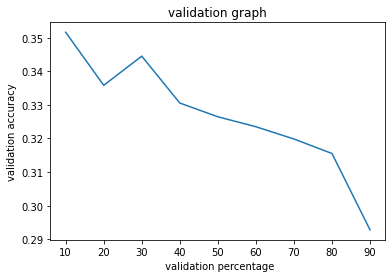

In [ ]:
plt.plot(axaxis,ayaxis)
plt.xlabel(" validation percentage")
plt.ylabel("validation accuracy")
plt.title("validation graph")


## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. 

In [ ]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies
  

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 20, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.33981431626689906
test accuracy is  0.34917953667953666


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?


**ANSWERS** 

I tried to answer the questions both theoriticaly and using code 

In [ ]:
#code for above questions 
iterations=[ 5,10,15,20]
byaxis=[]
bxaxis=[]
for ii in iterations:
  print('Average validation accuracy for',ii,'iteartions is', AverageAccuracy(alltraindata, alltrainlabel, 75/100, ii, classifier=NN))
  testpred = NN(alltraindata, alltrainlabel, testdata)
  print('test accuracy for ',ii,'iterations is ',Accuracy(testlabel, testpred) )
  byaxis.append(Accuracy(testlabel, testpred))
  bxaxis.append(ii)


Average validation accuracy for 5 iteartions is 0.34456496466543135
test accuracy for  5 iterations is  0.34917953667953666
Average validation accuracy for 10 iteartions is 0.344392959413093
test accuracy for  10 iterations is  0.34917953667953666
Average validation accuracy for 15 iteartions is 0.34164938948438395
test accuracy for  15 iterations is  0.34917953667953666
Average validation accuracy for 20 iteartions is 0.3383505091909875
test accuracy for  20 iterations is  0.34917953667953666


Text(0.5, 1.0, 'accuracies with respect to iterations')

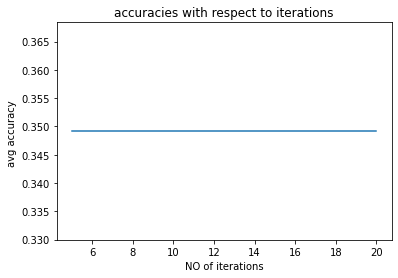

In [ ]:
plt.plot(bxaxis,byaxis)
plt.xlabel("NO of iterations")
plt.ylabel("avg accuracy ")
plt.title("accuracies with respect to iterations")

**1 answer** : As we are averaging the accuracy across multiple splits  we get an avg point/value  to which any new test accuracy pouint/value will be close with less ammount of difference 

**2 answer**: Since the test data(20%) is completely different from the validation and training data (80(validation+training), 20(test)) .. accuracy of test data remains mostly constant even though on averaging the validation data across multiple splits 

**3 answer**: the more number of iterations the more specific the avg will be. it doesnt mean that the validation avg gets changed drastically on increasing the iterations but there will change in the right most decimal part mostly of the validation accuracy avg value  or other words we can say that the avg remains almost same/constant 

**4 answer** : The question is not clear for me so thought of answering in 2 cases . 
**case a**: if the answer has to be with respect to test data then small train/validation data set may lead to decrease in accuaracy of test data even we iterate the train and validation data multiple time as we know that the more training given the best the test accuracy will be 
 **case b**:considering only training data/validation data not the test data. whatever the data set may be small or big .. increasing the iteration leads to improvement of validation accuaracy ( mostly right mostt decimal part ) or simple we can say that the accuracy remains constant 